# Homework 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
column_names = ["x", "y"]
df = pd.read_csv(r"C:\Users\fatma\OneDrive\Masaüstü\regression_data.dat", sep=' ', names=column_names)

In [3]:
df.head()

x         y
0  161.8636  185.7992
1  205.6503  111.4364
2  177.2683  134.8142
3  167.1650  189.2571
4  207.3360  183.1754

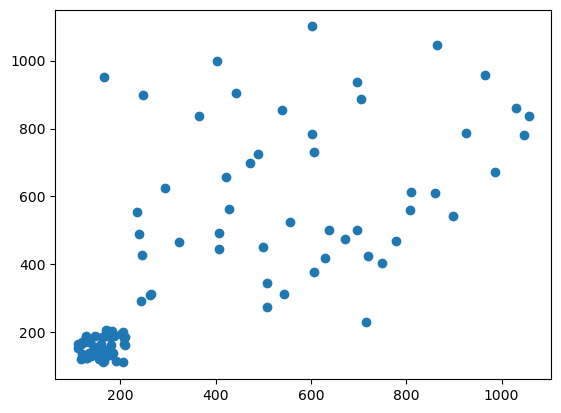

In [4]:
plt.scatter(df['x'], df['y'])

# 

In [5]:
def linear_regression(W, X):
    y_predicted = np.dot(X, W)
    return y_predicted

def polynomial_regression(W, X):
    w0, w1, w2 = W
    y_predicted = w2 * X[:, 2] + w1 * X[:, 1] + w0
    return y_predicted

def mean_sqaured_error(Y, y_predicted):
    loss = np.mean((Y - y_predicted)**2)
    return loss

def training(X, Y, W, model, learning_rate, criterion):
    
    #Zero The Gradients:
    gradient = np.zeros(W.shape)

    #Run The Model - Forward Pass:
    y_predicted = model(W,X)

    #Compute The Loss with Mean Squared Error:
    loss = criterion(Y, y_predicted)
    
    #Backpropagation:
    gradient = -2 * np.dot(X.T, (Y.ravel() - y_predicted))/len(Y)
    
    #Update The Weights:
    W = W - learning_rate * gradient

    return dict([('weights', W),
                ('loss', loss),
                ('predictions', y_predicted)])


def validation(X, Y, W, model, criterion):
    
    #Run The Model - Forward Pass:
    y_predicted = model(W,X)

    #Compute The Loss with Mean Squared Error:
    loss = criterion(Y, y_predicted)
    
    return dict([('weights', W),
                ('loss', loss),
                ('predictions', y_predicted)])

def data_loader(df, degree):
    column_names = ["x", "y"]
    df = pd.read_csv(r"C:\Users\fatma\OneDrive\Masaüstü\regression_data.dat", sep=' ', names=column_names)
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(df["x"].values.reshape(-1,1))
    Y = scaler.fit_transform(df["y"].values.reshape(-1,1))
    
    df["x"] = X
    df["y"] = Y
    df['0'] = 1
    
    for i in range(1,degree):
        df[str(i)] = df['x'] ** i
    X = np.concatenate([df[str(j)].values.reshape(-1, 1) for j in range(0,int(degree))], axis=1)
    Y = df["y"].values.reshape(-1,1)

    # Assuming you have your features X and labels Y
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4)

    # Split the temporary set into validation and test sets
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.6)
    
    return [X_train, Y_train, X_val, Y_val, X_test, Y_test]

In [60]:
def learning_model(df, n_features, model, nb_epoch, learning_rate, criterion):
    #The Random Initialization for The Weights:
    W = np.random.randn(n_features)
    
    trigger = 0
    best_val_loss = float('inf')
    
    data = data_loader(df,n_features)
    
    for epoch in range(nb_epoch):
        print("epoch:", epoch + 1)
        
        #Training
        train_results = training(data[0], data[1], W, model, learning_rate, criterion)

        # Validation
        val_results = validation(data[2], data[3], train_results['weights'], model, criterion)
        
        num_epochs = str(nb_epoch)
        print(f"Epoch {epoch + 1}/{nb_epoch} - "
          f"Train Loss: {train_results['loss']:.4f} - "
          f"Val Loss: {val_results['loss']:.4f}")
        
        # Check if the current model is the best so far
        if val_results['loss'] < best_val_loss + 0.001:
            best_val_loss = val_results['loss']
            # Save the model weights
            # Update the best weights
            best_weights = val_results['weights']
            np.save('best_weights.npy', best_weights)
            W = best_weights
            print("New best model saved." + f"Epoch {epoch + 1}" +f"With loss {best_val_loss}")
            
    training_results = validation(data[0], data[1], best_weights, model, criterion)
    test_results = validation(data[4], data[5], best_weights, model, criterion)
    if n_features == 3:
        test_variance = np.var([validation(X.reshape(1,3), Y, best_weights, model, criterion)['loss'] for X, Y in zip(data[4], data[5])])
    else:
        test_variance = np.var([validation(X, Y, best_weights, model, criterion)['loss'] for X, Y in zip(data[4], data[5])])
    
    print("Final Test Loss:", test_results['loss'])
    
    return dict([('Test MSE', test_results['loss']),
                 ('Test Variance', test_variance),
                ('Training SSE', 60*training_results['loss']),
                ('Weights', test_results['weights']),
                ('Test Predictions', test_results['predictions']),
                ('Test Y',  data[5]),
                ('Test X', data[4]),
                ('Train X', data[0]),
                ('Train Y' , data[1]),
                ('Train Predictions',train_results['predictions'])])

In [64]:
linear_reg_model_results = learning_model(df, 2, linear_regression, 20000, 0.5, mean_sqaured_error)

epoch: 1
Epoch 1/20000 - Train Loss: 0.4482 - Val Loss: 0.1258
New best model saved.Epoch 1With loss 0.12583807730116764
epoch: 2
Epoch 2/20000 - Train Loss: 0.1078 - Val Loss: 0.1232
New best model saved.Epoch 2With loss 0.12319007844763315
epoch: 3
Epoch 3/20000 - Train Loss: 0.1040 - Val Loss: 0.1235
New best model saved.Epoch 3With loss 0.12349642829303499
epoch: 4
Epoch 4/20000 - Train Loss: 0.1045 - Val Loss: 0.1238
New best model saved.Epoch 4With loss 0.12376188416511058
epoch: 5
Epoch 5/20000 - Train Loss: 0.1048 - Val Loss: 0.1240
New best model saved.Epoch 5With loss 0.12400900119148967
epoch: 6
Epoch 6/20000 - Train Loss: 0.1051 - Val Loss: 0.1242
New best model saved.Epoch 6With loss 0.12423601671303008
epoch: 7
Epoch 7/20000 - Train Loss: 0.1054 - Val Loss: 0.1244
New best model saved.Epoch 7With loss 0.12444469448553722
epoch: 8
Epoch 8/20000 - Train Loss: 0.1057 - Val Loss: 0.1246
New best model saved.Epoch 8With loss 0.12463641376040206
epoch: 9
Epoch 9/20000 - Train L

In [65]:
linear_reg_model_results

{'Test MSE': 0.10735390810582557,
 'Test Variance': 0.00462803670415804,
 'Training SSE': 6.519777153031311,
 'Weights': array([0.11354108, 0.59706048]),
 'Test Predictions': array([0.17614558, 0.55449468, 0.53486729, 0.1445206 , 0.1435579 ,
        0.49789844, 0.30975106, 0.38699935, 0.42571516, 0.1282072 ,
        0.19399106, 0.11939938, 0.17361914, 0.1509515 , 0.22850899,
        0.12507402, 0.58918957, 0.1545058 , 0.44563971, 0.12854019,
        0.35934569, 0.42307477, 0.13649604, 0.14887161]),
 'Test Y': array([[0.05128089],
        [0.50621368],
        [0.36238072],
        [0.02461088],
        [0.04186107],
        [0.31594137],
        [0.55279644],
        [0.20356262],
        [0.62744653],
        [0.02838701],
        [0.38199484],
        [0.06194675],
        [0.        ],
        [0.03599609],
        [0.51953776],
        [0.07701797],
        [0.94539646],
        [0.09505313],
        [0.39451291],
        [0.06045871],
        [0.34274477],
        [1.        ],
  

In [66]:
from sklearn.metrics import r2_score
r2_score(linear_reg_model_results['Test Y'], linear_reg_model_results['Test Predictions'])

0.5364606974290856

In [67]:
polynomial_reg_model_results = learning_model(df, 3, polynomial_regression, 10000, 0.5, mean_sqaured_error)

epoch: 1
Epoch 1/10000 - Train Loss: 1.0021 - Val Loss: 0.0670
New best model saved.Epoch 1With loss 0.06703549462494307
epoch: 2
Epoch 2/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 3
Epoch 3/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 4
Epoch 4/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 5
Epoch 5/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 6
Epoch 6/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 7
Epoch 7/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 8
Epoch 8/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 9
Epoch 9/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 10
Epoch 10/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 11
Epoch 11/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 12
Epoch 12/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 13
Epoch 13/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 14
Epoch 14/10000 - Train Loss: 0.1419 - Val Loss: 0.0933
epoch: 15
Epoch 15/10000 - Train Loss: 0.1419 - Va

In [68]:
polynomial_reg_model_results

{'Test MSE': 0.11031876244860889,
 'Test Variance': 0.003733228714103682,
 'Training SSE': 8.513092560649522,
 'Weights': array([ 0.0859916 , -0.11545697,  0.86592295]),
 'Test Predictions': array([0.7931043 , 0.082182  , 0.19026941, 0.08218143, 0.13451684,
        0.08528663, 0.08223546, 0.17811373, 0.34756428, 0.08367801,
        0.6869981 , 0.14492153, 0.0822117 , 0.08314143, 0.0821686 ,
        0.08694788, 0.08215544, 0.08318486, 0.08305041, 0.0821594 ,
        0.08236767, 0.28336672, 0.08498647, 0.08231548]),
 'Test Y': array([[7.58538927e-01],
        [7.87006838e-02],
        [2.37808128e-01],
        [2.29578003e-02],
        [3.36761364e-01],
        [5.50947363e-02],
        [7.85887320e-04],
        [6.20151563e-01],
        [8.35468912e-01],
        [2.83870065e-02],
        [8.54771745e-01],
        [4.56070406e-01],
        [9.47119118e-02],
        [0.00000000e+00],
        [7.52341228e-02],
        [1.83732082e-01],
        [1.91033017e-02],
        [8.95471626e-02],
  

In [69]:
from sklearn.metrics import r2_score
r2_score(polynomial_reg_model_results['Test Y'], polynomial_reg_model_results['Test Predictions'])

0.633258739582736

In [52]:
def plot_results(features, actual_values, predicted_values):
    plt.scatter(features[:, 1], actual_values, label='Actual Values')
    plt.scatter(features[:, 1], predicted_values, color='red', label='Predicted Values')
    plt.xlabel('Feature Values')
    plt.ylabel('Target Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

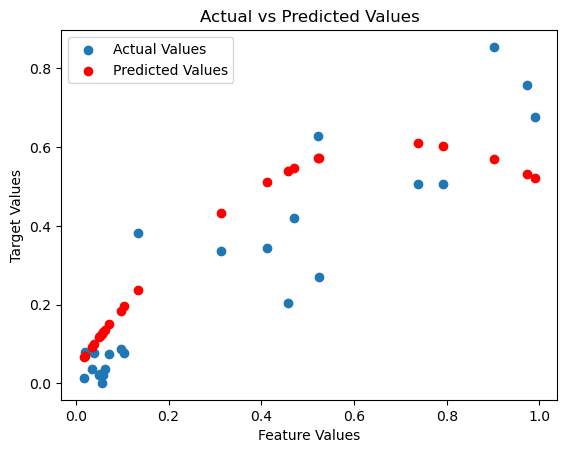

In [53]:
plot_results(polynomial_reg_model_results['Test X'],
             polynomial_reg_model_results['Test Y'],
             polynomial_reg_model_results['Test Predictions'])

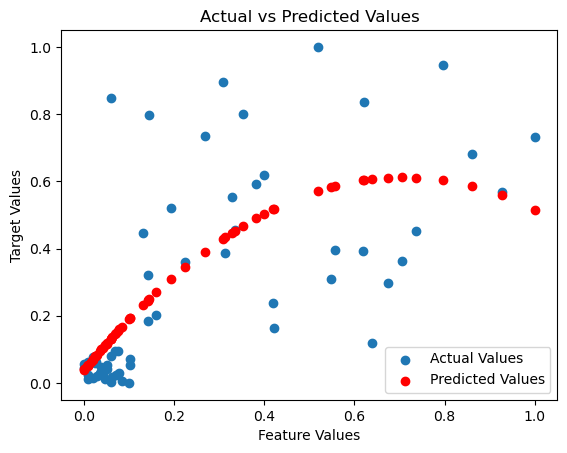

In [54]:
plot_results(polynomial_reg_model_results['Train X'],
             polynomial_reg_model_results['Train Y'],
             polynomial_reg_model_results['Train Predictions'])

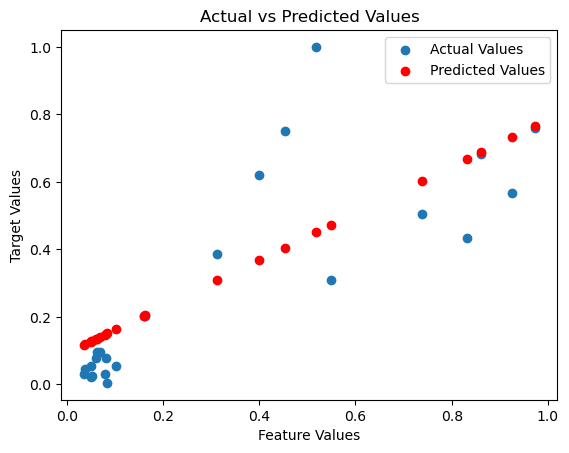

In [44]:
plot_results(linear_reg_model_results['Test X'],
             linear_reg_model_results['Test Y'],
             linear_reg_model_results['Test Predictions'])

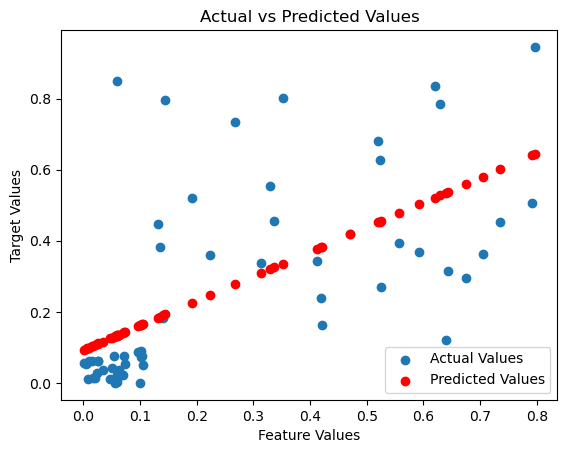

In [45]:
plot_results(linear_reg_model_results['Train X'],
             linear_reg_model_results['Train Y'],
             linear_reg_model_results['Train Predictions'])

In [18]:
def data_loader_1(df):
    column_names = ["x", "y"]
    df = pd.read_csv(r"C:\Users\fatma\OneDrive\Masaüstü\regression_data.dat", sep=' ', names=column_names)
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(df["x"].values.reshape(-1,1))
    Y = scaler.fit_transform(df["y"].values.reshape(-1,1))
    
    # Assuming you have your features X and labels Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    return [X_train, Y_train, X_test, Y_test]

def data_loader_2(df):
    column_names = ["x", "y"]
    df = pd.read_csv(r"C:\Users\fatma\OneDrive\Masaüstü\regression_data.dat", sep=' ', names=column_names)
    
    df["x2"] = df['x'] ** 2
    y = df["y"]
    x = df.drop("y", axis=1)  

    scaler = MinMaxScaler()
    X = scaler.fit_transform(x)
    Y = scaler.fit_transform(y.values.reshape(-1,1))
    
    # Assuming you have your features X and labels Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    return [X_train, Y_train, X_test, Y_test]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def parameter_init(input_size, J_initial):
    #Initiallize The Parameters
    W1 = np.random.rand(J_initial, input_size)
    b1 = np.zeros((J_initial, 1))
    W2 = np.random.rand(1, J_initial)
    b2 = np.zeros((1, 1))
    return  W1, b1, W2, b2
    
def forwardprop(W1, X, W2, Y, b1, b2, criterion):
    #Forward Propagation
    Z1 = np.dot(W1, X.reshape(-1, 1)) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2  # Linear activation for regression
    
    #Compute The Loss with Mean Squared Error:
    loss = criterion(Y, A2)
    return Z1, A1, Z2, A2, loss

def backprop(Z1, A1, Z2, A2, X, Y, W1, b1, W2, b2, learning_rate):
    #Backpropagation:
    # Compute gradients for the output layer
    dZ2 = A2 - Y.reshape(-1, 1)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    # Compute gradients for the hidden layer
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.reshape(-1, 1).T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    #Update The Weights:
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [72]:
from statistics import mean
def training_mlp(data_loader, df, input_size, hidden_size, num_epochs, learning_rate, criterion, lr_multip):
    #Load the data.
    data = data_loader(df)
    hidden_size_counter = 1
    X_train = data[0]
    Y_train = data[1]
    X_test = data[2]
    Y_test = data[3]
    
    best_train_loss = float('inf')
    test_loss_previous = float('inf')
    test_loss = 100
    #initial_learning_rate = learning_rate
    while test_loss < test_loss_previous: 
        W1, b1, W2, b2 = parameter_init(input_size, hidden_size)
        learning_rate = initial_learning_rate
        for epoch in range(num_epochs):
            total_loss = 0
            for X,Y in zip(X_train,Y_train):
                # Forward propagation & Loss
                Z1, A1, Z2, A2, loss = forwardprop(W1, X, W2, Y, b1, b2, criterion)
                total_loss += loss
                # Backward propagation & Updating The Weights
                W1, b1, W2, b2 = backprop(Z1, A1, Z2, A2, X, Y, W1, b1, W2, b2, learning_rate)
            #Update the learning rate.
            learning_rate = learning_rate * lr_multip
            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{num_epochs} - Loss: {loss}")

            avg_loss = (total_loss)
            if avg_loss < best_train_loss + 0.001:
                        best_train_loss = loss
                        # Save the model weights
                        # Update the best weights
                        best_weights = np.concatenate([W1.flatten(), b1.flatten(), W2.flatten(), b2.flatten()])
                        np.save('best_weights.npy', best_weights)
                        print("New best model saved." + f"Epoch {epoch + 1}" +f"With loss {best_train_loss}")
                      
        train_predictions = [forwardprop(W1, X, W2, Y, b1, b2, criterion)[2] for X, Y in zip(X_train, Y_train)]
        
        test_loss_previous = test_loss

        test_predictions = [forwardprop(W1, X, W2, Y, b1, b2, criterion)[2] for X, Y in zip(X_test, Y_test)]
        test_loss = mean([forwardprop(W1, X, W2, Y, b1, b2, criterion)[4] for X, Y in zip(X_test, Y_test)])
        test_variance = np.var([forwardprop(W1, X, W2, Y, b1, b2, criterion)[4] for X, Y in zip(X_test, Y_test)])

        print("Final Test Error:", test_loss)
        print("Final Test Variance:", test_variance)
        print("Hidden Layer Size:", hidden_size)
        
        hidden_size += 1
        hidden_size_counter += 1
        
    return dict([('Test MSE', test_loss),
                 ('Test Variance', test_variance),
                 ('Training SSE', avg_loss),
                 ('Weights', best_weights),
                ('Test Predictions', test_predictions),
                ('Test Y',  data[3]),
                ('Test X', data[2]),
                ('Train X', data[0]),
                ('Train Y' , data[1]),
                ('Train Predictions',train_predictions),
                ('Hidden Layer Size', hidden_size)])

In [73]:
mlp_model_results = training_mlp(data_loader_1, df, 1, 3, 5000, 0.5, mean_sqaured_error, 0.9)

Epoch 0/5000 - Loss: 0.0037868632675621934
New best model saved.Epoch 1With loss 0.0037868632675621934
Epoch 100/5000 - Loss: 0.0017577716135764759
Epoch 200/5000 - Loss: 0.0019821771927129943
Epoch 300/5000 - Loss: 0.0023266099972085764
Epoch 400/5000 - Loss: 0.002485535526055076
Epoch 500/5000 - Loss: 0.002584423383535972
Epoch 600/5000 - Loss: 0.0026626099016677186
Epoch 700/5000 - Loss: 0.002732659786093844
Epoch 800/5000 - Loss: 0.0027985491419221555
Epoch 900/5000 - Loss: 0.0028613904227460132
Epoch 1000/5000 - Loss: 0.0029213258067322984
Epoch 1100/5000 - Loss: 0.002978187444246942
Epoch 1200/5000 - Loss: 0.003031740373256954
Epoch 1300/5000 - Loss: 0.0030817758342781775
Epoch 1400/5000 - Loss: 0.0031281467624036073
Epoch 1500/5000 - Loss: 0.0031707784905783036
Epoch 1600/5000 - Loss: 0.0032096675044312037
Epoch 1700/5000 - Loss: 0.003244873969611369
Epoch 1800/5000 - Loss: 0.003276511108737396
Epoch 1900/5000 - Loss: 0.0033047333699290564
Epoch 2000/5000 - Loss: 0.0033297246931

In [74]:
mlp_model_results

{'Test MSE': 0.05864729063623083,
 'Test Variance': 0.026595870677969657,
 'Training SSE': 3.200119851974068,
 'Weights': array([ 0.98615377,  0.94907831,  0.60077753, -0.25148248, -0.29301353,
        -0.27523531,  0.43465059,  0.67218129,  0.56717331, -0.69322984]),
 'Test Predictions': [array([[0.59132119]]),
  array([[0.53728938]]),
  array([[0.02135268]]),
  array([[-0.10233612]]),
  array([[0.52443095]]),
  array([[0.53826283]]),
  array([[-0.02615479]]),
  array([[0.64045184]]),
  array([[-0.13014551]]),
  array([[0.1942877]]),
  array([[0.49412192]]),
  array([[0.55583055]]),
  array([[-0.03637553]]),
  array([[-0.10507344]]),
  array([[-0.07664909]]),
  array([[-0.11942372]]),
  array([[0.48179823]]),
  array([[-0.12154715]]),
  array([[0.00110623]]),
  array([[0.58049511]])],
 'Test Y': array([[0.43492689],
        [0.30947375],
        [0.0296656 ],
        [0.07701797],
        [0.75030091],
        [0.39451291],
        [0.84858123],
        [0.75853893],
        [0.042947

In [75]:
def plot_results(features, actual_values, predicted_values):
    features = features.flatten()
    actual_values = actual_values.flatten()
    plt.scatter(features, actual_values, label='Actual Values')
    plt.scatter(features, predicted_values, color='red', label='Predicted Values')
    plt.xlabel('Feature Values')
    plt.ylabel('Target Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

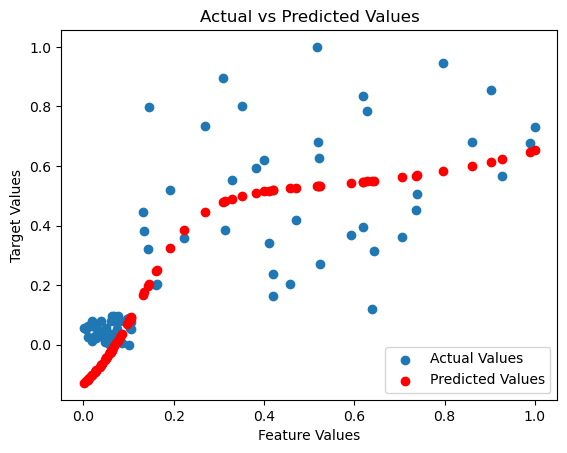

In [76]:
plot_results(mlp_model_results['Train X'],
             mlp_model_results['Train Y'],
             mlp_model_results['Train Predictions'])

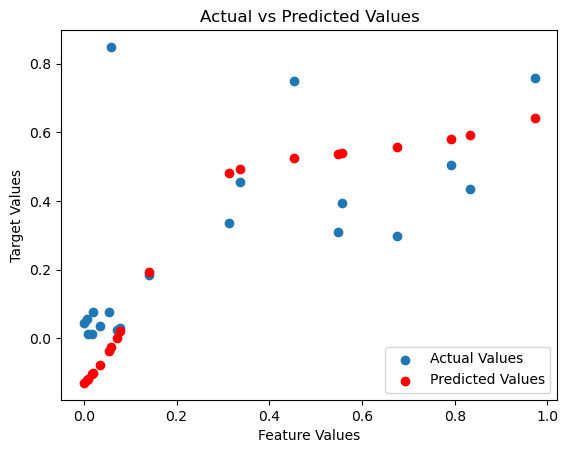

In [82]:
plot_results(mlp_model_results['Test X'],
             mlp_model_results['Test Y'],
             mlp_model_results['Test Predictions'])

In [77]:
mlp_model_results_2 = training_mlp(data_loader_2, df, 2, 3, 5000, 0.5, mean_sqaured_error, 0.9)

Epoch 0/5000 - Loss: 0.5450815600021557
New best model saved.Epoch 1With loss 0.5450815600021557
Epoch 100/5000 - Loss: 0.18713630232713924
Epoch 200/5000 - Loss: 0.18053772442084415
Epoch 300/5000 - Loss: 0.17795515962728367
Epoch 400/5000 - Loss: 0.17711674501785732
Epoch 500/5000 - Loss: 0.16730020932845707
Epoch 600/5000 - Loss: 0.15731727003887833
Epoch 700/5000 - Loss: 0.1506840110144563
Epoch 800/5000 - Loss: 0.14358152412546912
Epoch 900/5000 - Loss: 0.13680499294448473
Epoch 1000/5000 - Loss: 0.1310397072572069
Epoch 1100/5000 - Loss: 0.12632164911712312
Epoch 1200/5000 - Loss: 0.1225266270462016
Epoch 1300/5000 - Loss: 0.1194900986081265
Epoch 1400/5000 - Loss: 0.11705523095783989
Epoch 1500/5000 - Loss: 0.11508979649536408
Epoch 1600/5000 - Loss: 0.11348860020423605
Epoch 1700/5000 - Loss: 0.11217029119964181
Epoch 1800/5000 - Loss: 0.11107273977618108
Epoch 1900/5000 - Loss: 0.110148662931895
Epoch 2000/5000 - Loss: 0.10936201603176425
Epoch 2100/5000 - Loss: 0.108685192468

In [78]:
mlp_model_results_2

{'Test MSE': 0.04886576393303674,
 'Test Variance': 0.0029858758962448303,
 'Training SSE': 3.7902930656361473,
 'Weights': array([ 0.27515433,  0.77416172,  0.47139188,  0.57313076,  0.123971  ,
         0.6792633 , -0.22815325, -0.21574784, -0.19100724,  0.54263679,
         0.44236537,  0.29514763, -0.44235161]),
 'Test Predictions': [array([[0.47751004]]),
  array([[0.63574465]]),
  array([[0.51320778]]),
  array([[0.257764]]),
  array([[0.58467346]]),
  array([[0.26798474]]),
  array([[0.24827412]]),
  array([[0.14743071]]),
  array([[0.50528965]]),
  array([[0.54992253]]),
  array([[0.13862969]]),
  array([[0.1454549]]),
  array([[0.84007813]]),
  array([[0.60933179]]),
  array([[0.70124311]]),
  array([[0.5506293]]),
  array([[0.18528067]]),
  array([[0.30887274]]),
  array([[0.37792306]]),
  array([[0.47217589]])],
 'Test Y': array([[0.31594137],
        [0.20356262],
        [0.30947375],
        [0.09471191],
        [0.3589351 ],
        [0.07829474],
        [0.02364215],
 

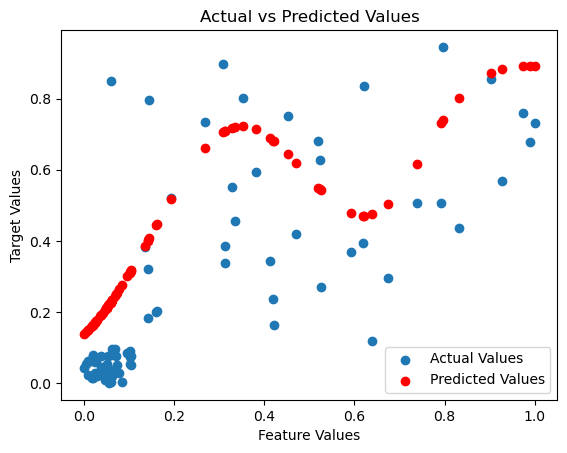

In [79]:
plot_results(mlp_model_results_2['Train X'][:,0],
             mlp_model_results_2['Train Y'],
             mlp_model_results_2['Train Predictions'])

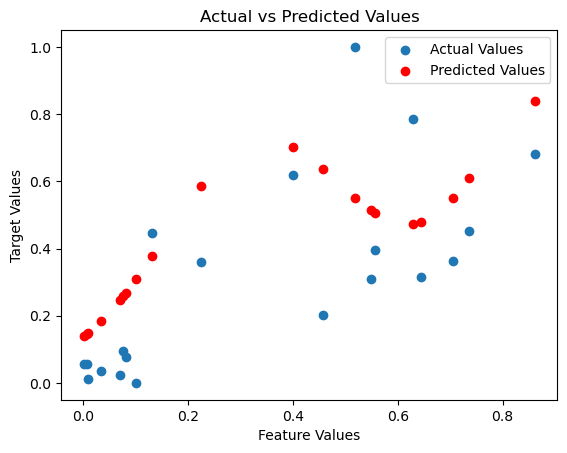

In [83]:
plot_results(mlp_model_results_2['Test X'][:,0],
             mlp_model_results_2['Test Y'],
             mlp_model_results_2['Test Predictions'])

In [80]:
training_sse = [linear_reg_model_results['Training SSE'], polynomial_reg_model_results['Training SSE'],
mlp_model_results['Training SSE'],mlp_model_results_2['Training SSE']]
test_mse = [linear_reg_model_results['Test MSE'], polynomial_reg_model_results['Test MSE'],
mlp_model_results['Test MSE'],mlp_model_results_2['Test MSE']]
test_variance = [linear_reg_model_results['Test Variance'], polynomial_reg_model_results['Test Variance'],
mlp_model_results['Test Variance'],mlp_model_results_2['Test Variance']]

In [81]:
data = {'Training SSE':training_sse, 'Test MSE': test_mse, 'Test Variance': test_variance }
df = pd.DataFrame(data)
df

Training SSE  Test MSE  Test Variance
0      6.519777  0.107354       0.004628
1      8.513093  0.110319       0.003733
2      3.200120  0.058647       0.026596
3      3.790293  0.048866       0.002986